,x,y
0,1201.0,475.0
1,1200.0,475.0
2,1198.0,475.0
3,1222.0,500.0
4,1219.0,500.0
...,...,...
1699,1218.0,475.0
1700,1217.0,473.0
1701,1242.0,498.0
1702,1242.0,498.0


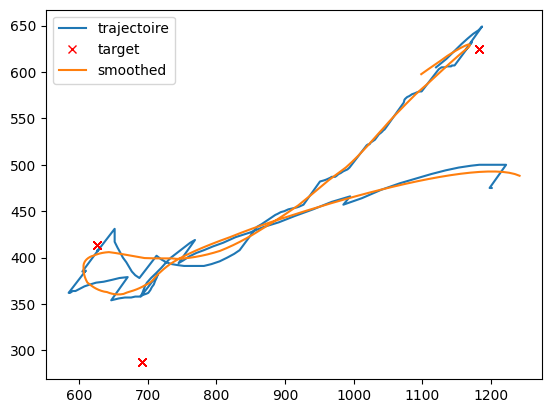

In [2]:
from utils.dataset_handling import read_dataset

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

(traj, y, targets, traj) = read_dataset("/home/jmartinsaquet/Documents/code/IA2_codes/clone/datasets/P0_C1.csv", "vec")

index = 200

xhat = savgol_filter(traj['x'].to_numpy(), 50, 3) 
yhat = savgol_filter(traj['y'].to_numpy(), 50, 3) 

plt.figure()
plt.plot(traj['x'][:index], traj['y'][:index], label="trajectoire")
plt.plot(targets['x_to'][:index], targets['y_to'][:index], 'rx', label="target")
plt.plot(xhat[:index], yhat[:index], label="smoothed")
plt.legend()
traj

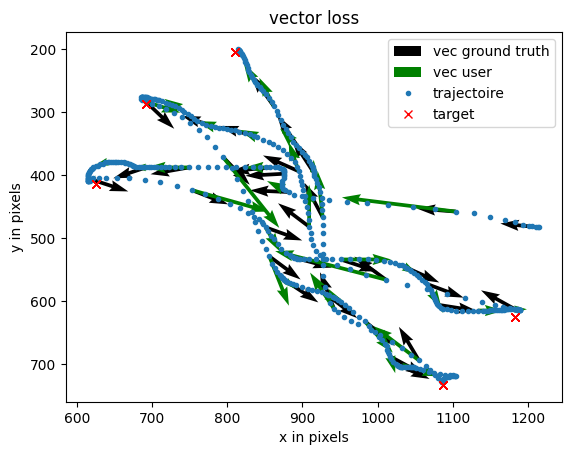

In [ ]:
from dataset_handling import *
traj, y, targets = read_dataset("/home/jmartinsaquet/Documents/code/IA2_codes/clone/datasets/P0_C0.csv", "vec")

index = 500
e = 10
indexes = [i for i in range(index - e) if i % e == 0]

ax = plt.subplot(1, 1, 1)
# ax.quiver(traj['x'][indexes], traj['y'][indexes], y['dx'][indexes], y['dy'][indexes],  angles="xy", label="vec ground truth")
# ax.quiver(traj['x'][indexes], traj['y'][indexes], traj['dx'][indexes], traj['dy'][indexes], angles="xy", color="green", label="vec user")

# ax.plot(traj['x'][:index], traj['y'][:index], '.', label="trajectoire")
ax.plot(targets['x_to'][indexes], targets['y_to'][indexes], 'rx', label="target")
ax.set_title("vector loss")
ax.set_xlabel("x in pixels")
ax.set_ylabel("y in pixels")
ax.invert_yaxis()
plt.legend()

In [13]:
from pyCGP import pycgp
from pyCGP.pycgp.evaluators.srevaluator import DEFAULT_SR_LIBRARY
import numpy as np



g = pycgp.CGP_with_cste.random(4, 2, 0, 30, 1, DEFAULT_SR_LIBRARY, -1, False, 0, 1, (10, ), np.float128 )
g.genome



array([ 4,  0,  1,  5,  2,  2,  0,  4,  5,  3,  4,  0,  4,  2,  7,  2,  4,
        1,  0,  5,  5,  2,  3,  3,  4,  3,  8,  0,  1, 12,  2,  8, 12,  1,
        1,  8,  3,  1, 13,  2, 12,  3,  4,  1, 16,  5, 18, 11,  2,  4, 19,
        2,  9, 13,  4, 18, 13,  1, 20, 21,  3, 19, 22,  0,  5, 21,  5, 19,
        1,  0,  0, 10,  0,  0,  2,  1, 22,  4,  5, 17, 18,  2,  5, 26,  5,
       22, 20,  2,  8, 20, 33, 31])

In [ ]:

err =  0 
for xi, yi in zip(x, y):

    ypred = eval_cgp(xi)
    err +=  (yi - ypred)**2

return err/len(x)


